In [1]:
import pandas as pd
import numpy as np
from fastai.structured import *
from fastai.column_data import *
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score
from metrics import print_metrics_binary
import matplotlib.pyplot as plt
#from tqdm import TqdmSynchronisationWarning
np.set_printoptions(threshold=50, edgeitems=20)

/home/andreas/anaconda3/lib/python3.6/site-packages/numexpr/cpuinfo.py:42: UserWarning: [Errno 2] No such file or directory: 'uname': 'uname'
  warnings.warn(str(e), UserWarning, stacklevel=stacklevel)


In [2]:
#print(torch.cuda.current_device())
#torch.cuda.set_device(1)

In [3]:
#warnings.filterwarnings("ignore", category=TqdmSynchronisationWarning)

In [4]:
train = pd.read_csv('./datasets/ihm/train_data2.csv')
test = pd.read_csv('./datasets/ihm/test_data2.csv')
val = pd.read_csv('./datasets/ihm/val_data2.csv')
train_data = train.drop('Unnamed: 0', axis=1)
test_data = test.drop('Unnamed: 0', axis=1)
val_data = val.drop('Unnamed: 0', axis=1)

In [5]:
train_data = train_data.reset_index().drop('index', axis=1)
val_data = val_data.reset_index().drop('index', axis=1)
test_data = test_data.reset_index().drop('index', axis=1)


def balance_dataset(df):
    num_died = len(train_data[train_data['Mortality'] == 1])
    num_survived = len(train_data[train_data['Mortality'] == 0])
    mortal_df = df[df['Mortality'] == 1].copy()
    counter = 0
    increased = 0
    new_data = []
    while increased < num_died*4:
        if mortal_df.iloc[counter]['Mortality'] == 1:
            new_patient = df.iloc[counter].copy()
            df = df.append(new_patient)
            increased = increased + 1
        counter = counter +1
        if counter == len(mortal_df): 
            counter = 0
        print(str(increased) +"/" + str(num_died))
    print(num_died+increased, num_survived)
    return df


train_data = balance_dataset(train_data)

1/1969
2/1969
3/1969
4/1969
5/1969
6/1969
7/1969
8/1969
9/1969
10/1969
11/1969
12/1969
13/1969
14/1969
15/1969
16/1969
17/1969
18/1969
19/1969
20/1969
21/1969
22/1969
23/1969
24/1969
25/1969
26/1969
27/1969
28/1969
29/1969
30/1969
31/1969
32/1969
33/1969
34/1969
35/1969
36/1969
37/1969
38/1969
39/1969
40/1969
41/1969
42/1969
43/1969
44/1969
45/1969
46/1969
47/1969
48/1969
49/1969
50/1969
51/1969
52/1969
53/1969
54/1969
55/1969
56/1969
57/1969
58/1969
59/1969
60/1969
61/1969
62/1969
63/1969
64/1969
65/1969
66/1969
67/1969
68/1969
69/1969
70/1969
71/1969
72/1969
73/1969
74/1969
75/1969
76/1969
77/1969
78/1969
79/1969
80/1969
81/1969
82/1969
83/1969
84/1969
85/1969
86/1969
87/1969
88/1969
89/1969
90/1969
91/1969
92/1969
93/1969
94/1969
95/1969
96/1969
97/1969
98/1969
99/1969
100/1969
101/1969
102/1969
103/1969
104/1969
105/1969
106/1969
107/1969
108/1969
109/1969
110/1969
111/1969
112/1969
113/1969
114/1969
115/1969
116/1969
117/1969
118/1969
119/1969
120/1969
121/1969
122/1969
123/1969
1

924/1969
925/1969
926/1969
927/1969
928/1969
929/1969
930/1969
931/1969
932/1969
933/1969
934/1969
935/1969
936/1969
937/1969
938/1969
939/1969
940/1969
941/1969
942/1969
943/1969
944/1969
945/1969
946/1969
947/1969
948/1969
949/1969
950/1969
951/1969
952/1969
953/1969
954/1969
955/1969
956/1969
957/1969
958/1969
959/1969
960/1969
961/1969
962/1969
963/1969
964/1969
965/1969
966/1969
967/1969
968/1969
969/1969
970/1969
971/1969
972/1969
973/1969
974/1969
975/1969
976/1969
977/1969
978/1969
979/1969
980/1969
981/1969
982/1969
983/1969
984/1969
985/1969
986/1969
987/1969
988/1969
989/1969
990/1969
991/1969
992/1969
993/1969
994/1969
995/1969
996/1969
997/1969
998/1969
999/1969
1000/1969
1001/1969
1002/1969
1003/1969
1004/1969
1005/1969
1006/1969
1007/1969
1008/1969
1009/1969
1010/1969
1011/1969
1012/1969
1013/1969
1014/1969
1015/1969
1016/1969
1017/1969
1018/1969
1019/1969
1020/1969
1021/1969
1022/1969
1023/1969
1024/1969
1025/1969
1026/1969
1027/1969
1028/1969
1029/1969
1030/1969
1031/1

1751/1969
1752/1969
1753/1969
1754/1969
1755/1969
1756/1969
1757/1969
1758/1969
1759/1969
1760/1969
1761/1969
1762/1969
1763/1969
1764/1969
1765/1969
1766/1969
1767/1969
1768/1969
1769/1969
1770/1969
1771/1969
1772/1969
1773/1969
1774/1969
1775/1969
1776/1969
1777/1969
1778/1969
1779/1969
1780/1969
1781/1969
1782/1969
1783/1969
1784/1969
1785/1969
1786/1969
1787/1969
1788/1969
1789/1969
1790/1969
1791/1969
1792/1969
1793/1969
1794/1969
1795/1969
1796/1969
1797/1969
1798/1969
1799/1969
1800/1969
1801/1969
1802/1969
1803/1969
1804/1969
1805/1969
1806/1969
1807/1969
1808/1969
1809/1969
1810/1969
1811/1969
1812/1969
1813/1969
1814/1969
1815/1969
1816/1969
1817/1969
1818/1969
1819/1969
1820/1969
1821/1969
1822/1969
1823/1969
1824/1969
1825/1969
1826/1969
1827/1969
1828/1969
1829/1969
1830/1969
1831/1969
1832/1969
1833/1969
1834/1969
1835/1969
1836/1969
1837/1969
1838/1969
1839/1969
1840/1969
1841/1969
1842/1969
1843/1969
1844/1969
1845/1969
1846/1969
1847/1969
1848/1969
1849/1969
1850/1969


2571/1969
2572/1969
2573/1969
2574/1969
2575/1969
2576/1969
2577/1969
2578/1969
2579/1969
2580/1969
2581/1969
2582/1969
2583/1969
2584/1969
2585/1969
2586/1969
2587/1969
2588/1969
2589/1969
2590/1969
2591/1969
2592/1969
2593/1969
2594/1969
2595/1969
2596/1969
2597/1969
2598/1969
2599/1969
2600/1969
2601/1969
2602/1969
2603/1969
2604/1969
2605/1969
2606/1969
2607/1969
2608/1969
2609/1969
2610/1969
2611/1969
2612/1969
2613/1969
2614/1969
2615/1969
2616/1969
2617/1969
2618/1969
2619/1969
2620/1969
2621/1969
2622/1969
2623/1969
2624/1969
2625/1969
2626/1969
2627/1969
2628/1969
2629/1969
2630/1969
2631/1969
2632/1969
2633/1969
2634/1969
2635/1969
2636/1969
2637/1969
2638/1969
2639/1969
2640/1969
2641/1969
2642/1969
2643/1969
2644/1969
2645/1969
2646/1969
2647/1969
2648/1969
2649/1969
2650/1969
2651/1969
2652/1969
2653/1969
2654/1969
2655/1969
2656/1969
2657/1969
2658/1969
2659/1969
2660/1969
2661/1969
2662/1969
2663/1969
2664/1969
2665/1969
2666/1969
2667/1969
2668/1969
2669/1969
2670/1969


3391/1969
3392/1969
3393/1969
3394/1969
3395/1969
3396/1969
3397/1969
3398/1969
3399/1969
3400/1969
3401/1969
3402/1969
3403/1969
3404/1969
3405/1969
3406/1969
3407/1969
3408/1969
3409/1969
3410/1969
3411/1969
3412/1969
3413/1969
3414/1969
3415/1969
3416/1969
3417/1969
3418/1969
3419/1969
3420/1969
3421/1969
3422/1969
3423/1969
3424/1969
3425/1969
3426/1969
3427/1969
3428/1969
3429/1969
3430/1969
3431/1969
3432/1969
3433/1969
3434/1969
3435/1969
3436/1969
3437/1969
3438/1969
3439/1969
3440/1969
3441/1969
3442/1969
3443/1969
3444/1969
3445/1969
3446/1969
3447/1969
3448/1969
3449/1969
3450/1969
3451/1969
3452/1969
3453/1969
3454/1969
3455/1969
3456/1969
3457/1969
3458/1969
3459/1969
3460/1969
3461/1969
3462/1969
3463/1969
3464/1969
3465/1969
3466/1969
3467/1969
3468/1969
3469/1969
3470/1969
3471/1969
3472/1969
3473/1969
3474/1969
3475/1969
3476/1969
3477/1969
3478/1969
3479/1969
3480/1969
3481/1969
3482/1969
3483/1969
3484/1969
3485/1969
3486/1969
3487/1969
3488/1969
3489/1969
3490/1969


4211/1969
4212/1969
4213/1969
4214/1969
4215/1969
4216/1969
4217/1969
4218/1969
4219/1969
4220/1969
4221/1969
4222/1969
4223/1969
4224/1969
4225/1969
4226/1969
4227/1969
4228/1969
4229/1969
4230/1969
4231/1969
4232/1969
4233/1969
4234/1969
4235/1969
4236/1969
4237/1969
4238/1969
4239/1969
4240/1969
4241/1969
4242/1969
4243/1969
4244/1969
4245/1969
4246/1969
4247/1969
4248/1969
4249/1969
4250/1969
4251/1969
4252/1969
4253/1969
4254/1969
4255/1969
4256/1969
4257/1969
4258/1969
4259/1969
4260/1969
4261/1969
4262/1969
4263/1969
4264/1969
4265/1969
4266/1969
4267/1969
4268/1969
4269/1969
4270/1969
4271/1969
4272/1969
4273/1969
4274/1969
4275/1969
4276/1969
4277/1969
4278/1969
4279/1969
4280/1969
4281/1969
4282/1969
4283/1969
4284/1969
4285/1969
4286/1969
4287/1969
4288/1969
4289/1969
4290/1969
4291/1969
4292/1969
4293/1969
4294/1969
4295/1969
4296/1969
4297/1969
4298/1969
4299/1969
4300/1969
4301/1969
4302/1969
4303/1969
4304/1969
4305/1969
4306/1969
4307/1969
4308/1969
4309/1969
4310/1969


5031/1969
5032/1969
5033/1969
5034/1969
5035/1969
5036/1969
5037/1969
5038/1969
5039/1969
5040/1969
5041/1969
5042/1969
5043/1969
5044/1969
5045/1969
5046/1969
5047/1969
5048/1969
5049/1969
5050/1969
5051/1969
5052/1969
5053/1969
5054/1969
5055/1969
5056/1969
5057/1969
5058/1969
5059/1969
5060/1969
5061/1969
5062/1969
5063/1969
5064/1969
5065/1969
5066/1969
5067/1969
5068/1969
5069/1969
5070/1969
5071/1969
5072/1969
5073/1969
5074/1969
5075/1969
5076/1969
5077/1969
5078/1969
5079/1969
5080/1969
5081/1969
5082/1969
5083/1969
5084/1969
5085/1969
5086/1969
5087/1969
5088/1969
5089/1969
5090/1969
5091/1969
5092/1969
5093/1969
5094/1969
5095/1969
5096/1969
5097/1969
5098/1969
5099/1969
5100/1969
5101/1969
5102/1969
5103/1969
5104/1969
5105/1969
5106/1969
5107/1969
5108/1969
5109/1969
5110/1969
5111/1969
5112/1969
5113/1969
5114/1969
5115/1969
5116/1969
5117/1969
5118/1969
5119/1969
5120/1969
5121/1969
5122/1969
5123/1969
5124/1969
5125/1969
5126/1969
5127/1969
5128/1969
5129/1969
5130/1969


5851/1969
5852/1969
5853/1969
5854/1969
5855/1969
5856/1969
5857/1969
5858/1969
5859/1969
5860/1969
5861/1969
5862/1969
5863/1969
5864/1969
5865/1969
5866/1969
5867/1969
5868/1969
5869/1969
5870/1969
5871/1969
5872/1969
5873/1969
5874/1969
5875/1969
5876/1969
5877/1969
5878/1969
5879/1969
5880/1969
5881/1969
5882/1969
5883/1969
5884/1969
5885/1969
5886/1969
5887/1969
5888/1969
5889/1969
5890/1969
5891/1969
5892/1969
5893/1969
5894/1969
5895/1969
5896/1969
5897/1969
5898/1969
5899/1969
5900/1969
5901/1969
5902/1969
5903/1969
5904/1969
5905/1969
5906/1969
5907/1969
5908/1969
5909/1969
5910/1969
5911/1969
5912/1969
5913/1969
5914/1969
5915/1969
5916/1969
5917/1969
5918/1969
5919/1969
5920/1969
5921/1969
5922/1969
5923/1969
5924/1969
5925/1969
5926/1969
5927/1969
5928/1969
5929/1969
5930/1969
5931/1969
5932/1969
5933/1969
5934/1969
5935/1969
5936/1969
5937/1969
5938/1969
5939/1969
5940/1969
5941/1969
5942/1969
5943/1969
5944/1969
5945/1969
5946/1969
5947/1969
5948/1969
5949/1969
5950/1969


6671/1969
6672/1969
6673/1969
6674/1969
6675/1969
6676/1969
6677/1969
6678/1969
6679/1969
6680/1969
6681/1969
6682/1969
6683/1969
6684/1969
6685/1969
6686/1969
6687/1969
6688/1969
6689/1969
6690/1969
6691/1969
6692/1969
6693/1969
6694/1969
6695/1969
6696/1969
6697/1969
6698/1969
6699/1969
6700/1969
6701/1969
6702/1969
6703/1969
6704/1969
6705/1969
6706/1969
6707/1969
6708/1969
6709/1969
6710/1969
6711/1969
6712/1969
6713/1969
6714/1969
6715/1969
6716/1969
6717/1969
6718/1969
6719/1969
6720/1969
6721/1969
6722/1969
6723/1969
6724/1969
6725/1969
6726/1969
6727/1969
6728/1969
6729/1969
6730/1969
6731/1969
6732/1969
6733/1969
6734/1969
6735/1969
6736/1969
6737/1969
6738/1969
6739/1969
6740/1969
6741/1969
6742/1969
6743/1969
6744/1969
6745/1969
6746/1969
6747/1969
6748/1969
6749/1969
6750/1969
6751/1969
6752/1969
6753/1969
6754/1969
6755/1969
6756/1969
6757/1969
6758/1969
6759/1969
6760/1969
6761/1969
6762/1969
6763/1969
6764/1969
6765/1969
6766/1969
6767/1969
6768/1969
6769/1969
6770/1969


7491/1969
7492/1969
7493/1969
7494/1969
7495/1969
7496/1969
7497/1969
7498/1969
7499/1969
7500/1969
7501/1969
7502/1969
7503/1969
7504/1969
7505/1969
7506/1969
7507/1969
7508/1969
7509/1969
7510/1969
7511/1969
7512/1969
7513/1969
7514/1969
7515/1969
7516/1969
7517/1969
7518/1969
7519/1969
7520/1969
7521/1969
7522/1969
7523/1969
7524/1969
7525/1969
7526/1969
7527/1969
7528/1969
7529/1969
7530/1969
7531/1969
7532/1969
7533/1969
7534/1969
7535/1969
7536/1969
7537/1969
7538/1969
7539/1969
7540/1969
7541/1969
7542/1969
7543/1969
7544/1969
7545/1969
7546/1969
7547/1969
7548/1969
7549/1969
7550/1969
7551/1969
7552/1969
7553/1969
7554/1969
7555/1969
7556/1969
7557/1969
7558/1969
7559/1969
7560/1969
7561/1969
7562/1969
7563/1969
7564/1969
7565/1969
7566/1969
7567/1969
7568/1969
7569/1969
7570/1969
7571/1969
7572/1969
7573/1969
7574/1969
7575/1969
7576/1969
7577/1969
7578/1969
7579/1969
7580/1969
7581/1969
7582/1969
7583/1969
7584/1969
7585/1969
7586/1969
7587/1969
7588/1969
7589/1969
7590/1969


In [6]:
train_data = train_data.reset_index().drop('index', axis=1)
val_data = val_data.reset_index().drop('index', axis=1)
test_data = test_data.reset_index().drop('index', axis=1)

In [7]:
print(len(train_data[train_data['Mortality'] == 1]))
print(len(train_data[train_data['Mortality'] == 0]))

3153
19220


In [8]:
train_size = len(train_data)
train_data = train_data.append(val_data)


print(train_size)
print(len(train_data))
val_idx = list(range(train_size, len(train_data)))

22373
25556


In [9]:
cat_vars = ['Capillary refill rate', 'Glascow coma scale eye opening' ,'Glascow coma scale motor response','Glascow coma scale total', 'Glascow coma scale verbal response']

all_cat_vars = []
counter = 0
for cat in cat_vars:
    for i in range(0,100):
        all_cat_vars.append(cat+str(i))

all_cat_vars.append('Length')
for v in all_cat_vars: train_data[v] = train_data[v].astype('category').cat.as_ordered()
for v in all_cat_vars: test_data[v] = test_data[v].astype('category').cat.as_ordered()

cat_sz = [(c, len(train_data[c].cat.categories)+1) for c in all_cat_vars]

print(cat_sz)

emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

[('Capillary refill rate0', 3), ('Capillary refill rate1', 3), ('Capillary refill rate2', 3), ('Capillary refill rate3', 3), ('Capillary refill rate4', 3), ('Capillary refill rate5', 3), ('Capillary refill rate6', 3), ('Capillary refill rate7', 3), ('Capillary refill rate8', 3), ('Capillary refill rate9', 3), ('Capillary refill rate10', 3), ('Capillary refill rate11', 3), ('Capillary refill rate12', 3), ('Capillary refill rate13', 3), ('Capillary refill rate14', 3), ('Capillary refill rate15', 3), ('Capillary refill rate16', 3), ('Capillary refill rate17', 3), ('Capillary refill rate18', 3), ('Capillary refill rate19', 3), ('Capillary refill rate20', 3), ('Capillary refill rate21', 3), ('Capillary refill rate22', 3), ('Capillary refill rate23', 3), ('Capillary refill rate24', 3), ('Capillary refill rate25', 3), ('Capillary refill rate26', 3), ('Capillary refill rate27', 3), ('Capillary refill rate28', 3), ('Capillary refill rate29', 3), ('Capillary refill rate30', 3), ('Capillary refil

In [10]:
test_data.head()

,Hours0,Capillary refill rate0,Diastolic blood pressure0,Fraction inspired oxygen0,Glascow coma scale eye opening0,Glascow coma scale motor response0,Glascow coma scale total0,Glascow coma scale verbal response0,Glucose0,Heart Rate0,...,Height99,Mean blood pressure99,Oxygen saturation99,Respiratory rate99,Systolic blood pressure99,Temperature99,Weight99,pH99,Mortality,Length
0,0.433333,0.0,49.0,0.21,Spontaneously,Obeys Commands,15.0,Oriented,128.0,81.0,...,170.0,64.333298,98.0,16.0,99.0,36.333334,81.000000,7.47,1,49
1,0.078333,0.0,38.0,0.21,Spontaneously,Obeys Commands,15.0,Oriented,128.0,65.0,...,170.0,82.000000,98.0,10.0,169.0,37.055599,64.900002,5.00,0,69
2,0.700000,0.0,43.0,0.21,Spontaneously,Obeys Commands,15.0,Oriented,128.0,70.0,...,170.0,54.666698,97.0,25.0,100.0,36.333334,81.000000,7.40,0,48
3,0.316944,0.0,64.0,0.21,Spontaneously,Obeys Commands,15.0,Oriented,128.0,67.0,...,170.0,67.000000,94.0,17.0,109.0,37.700001,90.199997,7.37,0,86
4,2.089167,0.0,35.0,0.21,To Speech,Localizes Pain,10.0,Incomprehensible sounds,128.0,96.0,...,170.0,69.000000,99.0,13.0,105.0,35.222223,83.000000,7.40,0,56


In [11]:
print(len(train_data[train_data['Mortality'] == 1]))
print(len(train_data[train_data['Mortality'] == 0]))

3586
21970


In [12]:
print(len(train_data.columns))
print(len(test_data.columns))

1802
1802


In [13]:
df, y, nas, mapper = proc_df(train_data, 'Mortality', do_scale=True)
df_test, y_test, nas_test, mapper_test = proc_df(test_data, 'Mortality', do_scale=True, mapper=mapper, na_dict=nas) 

md = ColumnarModelData.from_data_frame('./datasets/ihm/', val_idx, df, y.astype(np.float32), cat_flds=all_cat_vars, bs=32,
                                       test_df=df_test)

In [14]:
m = md.get_learner(emb_szs, len(df.columns)-len(all_cat_vars),
                   0.04, 1, [2000,1500,1000, 800, 500, 200], [0.05,0.04, 0.03,0.03,0.03,0.03], y_range=[0,1], crit = torch.nn.functional.binary_cross_entropy)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 52%|█████▏    | 363/700 [00:31<00:29, 11.35it/s, loss=1.62] 

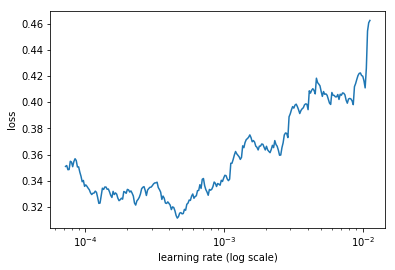

In [15]:
m.lr_find()
m.sched.plot(100)


In [16]:
lr = 0.00005


In [17]:
lrs = [lr/9, lr/3, lr]

In [18]:
m.fit(lrs, 2, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

 13%|█▎        | 89/700 [00:07<00:52, 11.71it/s, loss=0.469]

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/home/andreas/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/andreas/anaconda3/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/andreas/anaconda3/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss                               
    0      0.303185   0.317618  
    1      0.245291   0.315379                               
    2      0.21133    0.320947                               



[array([0.32095])]

In [19]:
y_predicted = m.predict(is_test=True)
preds = []
for pred in y_predicted:
    if pred > 0.5: 
        preds.append(1)
    else: 
        preds.append(0)
metrics = print_metrics_binary(y_test, preds)

confusion matrix:
[[2742  120]
 [ 248  126]]
accuracy = 0.88627934
precision class 0 = 0.91705686
precision class 1 = 0.5121951
recall class 0 = 0.9580713
recall calss 1 = 0.3368984
AUC of ROC = 0.6474848372739606
AUC of PRC = 0.46286567107390236
min(+P, Se) = 0.33689839572192515


In [20]:
m.fit(lrs, 2, cycle_len=2, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=6), HTML(value='')))

epoch      trn_loss   val_loss                               
    0      0.191444   0.332245  
    1      0.150223   0.339859                               
    2      0.160218   0.351882                               
    3      0.117881   0.386429                               
    4      0.089647   0.39476                                 
    5      0.077817   0.402329                                



[array([0.40233])]

In [21]:
y_predicted = m.predict(is_test=True)
preds = []
for pred in y_predicted:
    if pred > 0.5: 
        preds.append(1)
    else: 
        preds.append(0)
metrics = print_metrics_binary(y_test, preds)

confusion matrix:
[[2730  132]
 [ 245  129]]
accuracy = 0.88349813
precision class 0 = 0.91764706
precision class 1 = 0.49425286
recall class 0 = 0.9538784
recall calss 1 = 0.3449198
AUC of ROC = 0.6493990964024261
AUC of PRC = 0.4574417068383902
min(+P, Se) = 0.3449197860962567


In [22]:
m.fit(lrs, 2, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss                                
    0      0.077889   0.419592  
    1      0.075713   0.442875                                
    2      0.051054   0.461922                                



[array([0.46192])]

In [23]:
y_predicted = m.predict(is_test=True)
preds = []
for pred in y_predicted:
    if pred > 0.5: 
        preds.append(1)
    else: 
        preds.append(0)
metrics = print_metrics_binary(y_test, preds)

confusion matrix:
[[2731  131]
 [ 249  125]]
accuracy = 0.8825711
precision class 0 = 0.91644293
precision class 1 = 0.48828125
recall class 0 = 0.9542278
recall calss 1 = 0.3342246
AUC of ROC = 0.64422620582443
AUC of PRC = 0.4497263484454631
min(+P, Se) = 0.3342245989304813


In [24]:
m.fit(0.001, 2, cycle_len=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=4), HTML(value='')))

epoch      trn_loss   val_loss                               
    0      0.279369   0.314001  
    1      0.208218   0.322441                               
    2      0.234206   0.338087                               
    3      0.168802   0.351679                               



[array([0.35168])]

In [25]:
y_predicted = m.predict(is_test=True)
preds = []
for pred in y_predicted:
    if pred > 0.5: 
        preds.append(1)
    else: 
        preds.append(0)
metrics = print_metrics_binary(y_test, preds)

confusion matrix:
[[2740  122]
 [ 238  136]]
accuracy = 0.88875157
precision class 0 = 0.9200806
precision class 1 = 0.5271318
recall class 0 = 0.9573725
recall calss 1 = 0.36363637
AUC of ROC = 0.6605044152213964
AUC of PRC = 0.4821578680994555
min(+P, Se) = 0.36363636363636365


In [26]:
m.fit(0.001, 2, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss                               
    0      0.187259   0.353563  
    1      0.151522   0.35734                                



[array([0.35734])]

In [27]:
y_predicted = m.predict(is_test=True)
preds = []
for pred in y_predicted:
    if pred > 0.5: 
        preds.append(1)
    else: 
        preds.append(0)
metrics = print_metrics_binary(y_test, preds)

confusion matrix:
[[2760  102]
 [ 236  138]]
accuracy = 0.8955501
precision class 0 = 0.9212283
precision class 1 = 0.575
recall class 0 = 0.9643606
recall calss 1 = 0.36898395
AUC of ROC = 0.6666722721106738
AUC of PRC = 0.5084567499322461
min(+P, Se) = 0.3689839572192513


In [28]:
m.fit(lrs, 2, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss                                
    0      0.121393   0.399983  
    1      0.112988   0.415051                                



[array([0.41505])]

In [29]:
y_predicted = m.predict(is_test=True)
preds = []
for pred in y_predicted:
    if pred > 0.5: 
        preds.append(1)
    else: 
        preds.append(0)
metrics = print_metrics_binary(y_test, preds)

confusion matrix:
[[2740  122]
 [ 227  147]]
accuracy = 0.8921508
precision class 0 = 0.9234917
precision class 1 = 0.5464684
recall class 0 = 0.9573725
recall calss 1 = 0.39304814
AUC of ROC = 0.6752102975743375
AUC of PRC = 0.5048324305512059
min(+P, Se) = 0.393048128342246


In [30]:
m.fit(lrs, 2, cycle_len=3, cycle_mult=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=12), HTML(value='')))

epoch      trn_loss   val_loss                                
    0      0.106571   0.42424   
    1      0.095375   0.437529                                
    2      0.084574   0.439459                                
    3      0.095302   0.459969                                
    4      0.080587   0.493547                                
    5      0.083002   0.51899                                 
    6      0.073115   0.555455                                
    7      0.070026   0.588575                                
    8      0.069303   0.593341                                
    9      0.068365   0.610434                                
    10     0.057271   0.619952                                
    11     0.063297   0.621291                                



[array([0.62129])]

In [31]:
y_predicted = m.predict(is_test=True)
preds = []
for pred in y_predicted:
    if pred > 0.5: 
        preds.append(1)
    else: 
        preds.append(0)
metrics = print_metrics_binary(y_test, preds)

confusion matrix:
[[2705  157]
 [ 225  149]]
accuracy = 0.881953
precision class 0 = 0.9232082
precision class 1 = 0.4869281
recall class 0 = 0.9451433
recall calss 1 = 0.39839572
AUC of ROC = 0.6717694891945725
AUC of PRC = 0.477427055400952
min(+P, Se) = 0.3983957219251337


In [32]:
m.fit(lrs, 2, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss                                
    0      0.058184   0.676036  
    1      0.05131    0.688602                                



[array([0.6886])]

In [33]:
y_predicted = m.predict(is_test=True)
preds = []
for pred in y_predicted:
    if pred > 0.5: 
        preds.append(1)
    else: 
        preds.append(0)
metrics = print_metrics_binary(y_test, preds)

confusion matrix:
[[2709  153]
 [ 229  145]]
accuracy = 0.881953
precision class 0 = 0.92205584
precision class 1 = 0.48657718
recall class 0 = 0.9465409
recall calss 1 = 0.38770053
AUC of ROC = 0.6671207076312515
AUC of PRC = 0.47252204710607926
min(+P, Se) = 0.3877005347593583


In [34]:
m.fit(lrs, 2, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss                                
    0      0.060966   0.771497  
    1      0.054545   0.772209                                



[array([0.77221])]

In [35]:
y_predicted = m.predict(is_test=True)
preds = []
for pred in y_predicted:
    if pred > 0.5: 
        preds.append(1)
    else: 
        preds.append(0)
metrics = print_metrics_binary(y_test, preds)

confusion matrix:
[[2695  167]
 [ 229  145]]
accuracy = 0.8776267
precision class 0 = 0.92168266
precision class 1 = 0.46474358
recall class 0 = 0.9416492
recall calss 1 = 0.38770053
AUC of ROC = 0.6646748655627679
AUC of PRC = 0.46160525137384734
min(+P, Se) = 0.3877005347593583


In [36]:
m.fit(lrs, 2, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss                                
    0      0.048804   0.833156  
    1      0.040932   0.873108                                



[array([0.87311])]

In [37]:
y_predicted = m.predict(is_test=True)
preds = []
for pred in y_predicted:
    if pred > 0.5: 
        preds.append(1)
    else: 
        preds.append(0)
metrics = print_metrics_binary(y_test, preds)

confusion matrix:
[[2694  168]
 [ 228  146]]
accuracy = 0.8776267
precision class 0 = 0.92197126
precision class 1 = 0.46496814
recall class 0 = 0.9412998
recall calss 1 = 0.39037433
AUC of ROC = 0.6658370609535982
AUC of PRC = 0.462899919588003
min(+P, Se) = 0.39037433155080214


In [38]:
m.fit(lrs, 2, cycle_len=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=4), HTML(value='')))

epoch      trn_loss   val_loss                                
    0      0.050994   0.929701  
    1      0.042219   0.945781                                
    2      0.039504   0.973894                                
    3      0.038122   1.025802                                



[array([1.0258])]

In [39]:
y_predicted = m.predict(is_test=True)
preds = []
for pred in y_predicted:
    if pred > 0.5: 
        preds.append(1)
    else: 
        preds.append(0)
metrics = print_metrics_binary(y_test, preds)

confusion matrix:
[[2677  185]
 [ 225  149]]
accuracy = 0.8733004
precision class 0 = 0.9224673
precision class 1 = 0.44610777
recall class 0 = 0.9353599
recall calss 1 = 0.39839572
AUC of ROC = 0.6668778050576053
AUC of PRC = 0.4570168953289392
min(+P, Se) = 0.3983957219251337


In [40]:
m.fit(lrs, 2, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss                                
    0      0.034691   1.065103  
    1      0.033353   1.088997                                



[array([1.089])]

In [41]:
y_predicted = m.predict(is_test=True)
preds = []
for pred in y_predicted:
    if pred > 0.5: 
        preds.append(1)
    else: 
        preds.append(0)
metrics = print_metrics_binary(y_test, preds)

confusion matrix:
[[2682  180]
 [ 226  148]]
accuracy = 0.87453645
precision class 0 = 0.92228335
precision class 1 = 0.4512195
recall class 0 = 0.9371069
recall calss 1 = 0.3957219
AUC of ROC = 0.6664144216863418
AUC of PRC = 0.45839037255810183
min(+P, Se) = 0.39572192513368987


In [42]:
m.fit(lrs, 2, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss                                
    0      0.035294   1.166766  
    1      0.027936   1.205473                                



[array([1.20547])]

In [43]:
y_predicted = m.predict(is_test=True)
preds = []
for pred in y_predicted:
    if pred > 0.5: 
        preds.append(1)
    else: 
        preds.append(0)
metrics = print_metrics_binary(y_test, preds)

confusion matrix:
[[2673  189]
 [ 228  146]]
accuracy = 0.8711372
precision class 0 = 0.9214064
precision class 1 = 0.4358209
recall class 0 = 0.9339623
recall calss 1 = 0.39037433
AUC of ROC = 0.6621682978508728
AUC of PRC = 0.448326290916076
min(+P, Se) = 0.39037433155080214


In [44]:
m.fit(lrs, 2, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss                                
    0      0.02323    1.238835  
    1      0.029405   1.28482                                 



[array([1.28482])]

In [45]:
y_predicted = m.predict(is_test=True)
preds = []
for pred in y_predicted:
    if pred > 0.5: 
        preds.append(1)
    else: 
        preds.append(0)
metrics = print_metrics_binary(y_test, preds)

confusion matrix:
[[2675  187]
 [ 223  151]]
accuracy = 0.8733004
precision class 0 = 0.9230504
precision class 1 = 0.44674557
recall class 0 = 0.9346611
recall calss 1 = 0.40374333
AUC of ROC = 0.6692021958392658
AUC of PRC = 0.459700557484118
min(+P, Se) = 0.4037433155080214


In [46]:
m.fit(lrs, 2, cycle_len=2, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=6), HTML(value='')))

epoch      trn_loss   val_loss                                
    0      0.031336   1.390065  
    1      0.028955   1.422584                                
    2      0.029538   1.392797                                
    3      0.019174   1.44222                                 
    4      0.015873   1.438548                                
    5      0.016926   1.456866                                 



[array([1.45687])]

In [47]:
y_predicted = m.predict(is_test=True)
preds = []
for pred in y_predicted:
    if pred > 0.5: 
        preds.append(1)
    else: 
        preds.append(0)
metrics = print_metrics_binary(y_test, preds)

confusion matrix:
[[2679  183]
 [ 227  147]]
accuracy = 0.8733004
precision class 0 = 0.9218857
precision class 1 = 0.44545454
recall class 0 = 0.9360587
recall calss 1 = 0.39304814
AUC of ROC = 0.6645534142759448
AUC of PRC = 0.4543255025349841
min(+P, Se) = 0.393048128342246


In [48]:
m.fit(lrs, 2, cycle_len=2, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=6), HTML(value='')))

epoch      trn_loss   val_loss                                
    0      0.019477   1.575248  
    1      0.016346   1.590577                                
    2      0.017094   1.576337                                 
    3      0.016774   1.723074                                 
    4      0.021504   1.740918                                 
    5      0.014927   1.72767                                  



[array([1.72767])]

In [49]:
y_predicted = m.predict(is_test=True)
preds = []
for pred in y_predicted:
    if pred > 0.5: 
        preds.append(1)
    else: 
        preds.append(0)
metrics = print_metrics_binary(y_test, preds)

confusion matrix:
[[2677  185]
 [ 223  151]]
accuracy = 0.8739184
precision class 0 = 0.92310345
precision class 1 = 0.44940478
recall class 0 = 0.9353599
recall calss 1 = 0.40374333
AUC of ROC = 0.6695516018490492
AUC of PRC = 0.4610301573714102
min(+P, Se) = 0.4037433155080214


In [50]:
m.fit(lrs, 2, cycle_len=2, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=6), HTML(value='')))

epoch      trn_loss   val_loss                                 
    0      0.009312   1.888147  
    1      0.010275   1.887637                                 
    2      0.008173   1.823103                                 
    3      0.012137   1.92059                                  
    4      0.012981   1.966926                                 
    5      0.010076   1.980166                                 



[array([1.98017])]

In [51]:
y_predicted = m.predict(is_test=True)
preds = []
for pred in y_predicted:
    if pred > 0.5: 
        preds.append(1)
    else: 
        preds.append(0)
metrics = print_metrics_binary(y_test, preds)

confusion matrix:
[[2668  194]
 [ 220  154]]
accuracy = 0.8720643
precision class 0 = 0.9238227
precision class 1 = 0.44252872
recall class 0 = 0.9322152
recall calss 1 = 0.4117647
AUC of ROC = 0.6719899699921897
AUC of PRC = 0.4611393041936096
min(+P, Se) = 0.4117647058823529


In [52]:
m.fit(lrs, 2, cycle_len=2, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=6), HTML(value='')))

epoch      trn_loss   val_loss                                 
    0      0.006543   2.056766  
    1      0.005685   2.069212                                 
    2      0.00624    2.133491                                 
    3      0.014377   2.132897                                 
    4      0.006539   2.147604                                 
    5      0.005316   2.127516                                 



[array([2.12752])]

In [53]:
y_predicted = m.predict(is_test=True)
preds = []
for pred in y_predicted:
    if pred > 0.5: 
        preds.append(1)
    else: 
        preds.append(0)
metrics = print_metrics_binary(y_test, preds)

confusion matrix:
[[2675  187]
 [ 220  154]]
accuracy = 0.87422746
precision class 0 = 0.9240069
precision class 1 = 0.4516129
recall class 0 = 0.9346611
recall calss 1 = 0.4117647
AUC of ROC = 0.6732128910264314
AUC of PRC = 0.4656813879904208
min(+P, Se) = 0.4117647058823529


In [54]:
m.fit(lrs, 2, cycle_len=2, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=6), HTML(value='')))

epoch      trn_loss   val_loss                                 
    0      0.009665   2.264038  
    1      0.005963   2.263752                                 
    2      0.007426   2.263655                                 
    3      0.003178   2.143026                                 
    4      0.005938   2.183415                                 
    5      0.005352   2.182165                                 



[array([2.18216])]

In [55]:
y_predicted = m.predict(is_test=True)
preds = []
for pred in y_predicted:
    if pred > 0.5: 
        preds.append(1)
    else: 
        preds.append(0)
metrics = print_metrics_binary(y_test, preds)

confusion matrix:
[[2683  179]
 [ 228  146]]
accuracy = 0.87422746
precision class 0 = 0.9216764
precision class 1 = 0.44923076
recall class 0 = 0.9374563
recall calss 1 = 0.39037433
AUC of ROC = 0.6639153278997896
AUC of PRC = 0.45503122777026656
min(+P, Se) = 0.39037433155080214


In [56]:
m.fit(lrs, 2, cycle_len=2, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=6), HTML(value='')))

epoch      trn_loss   val_loss                                 
    0      0.007087   2.395923  
    1      0.001259   2.413989                                 
    2      0.008993   2.293449                                 
    3      0.00269    2.303819                                 
    4      0.002069   2.25389                                   
    5      0.001305   2.254499                                 



[array([2.2545])]

In [57]:
y_predicted = m.predict(is_test=True)
preds = []
for pred in y_predicted:
    if pred > 0.5: 
        preds.append(1)
    else: 
        preds.append(0)
metrics = print_metrics_binary(y_test, preds)

confusion matrix:
[[2680  182]
 [ 219  155]]
accuracy = 0.8760816
precision class 0 = 0.9244567
precision class 1 = 0.45994064
recall class 0 = 0.9364081
recall calss 1 = 0.41443852
AUC of ROC = 0.6754233044466119
AUC of PRC = 0.47102764943984265
min(+P, Se) = 0.4144385026737968


In [58]:
m.fit(lrs, 2, cycle_len=2, cycle_mult=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=8), HTML(value='')))

epoch      trn_loss   val_loss                                 
    0      0.00267    2.435007  
    1      0.003479   2.435391                                  
    2      0.004477   2.295907                                  
    3      0.003225   2.332483                                  
    4      0.00304    2.339771                                 
    5      0.001092   2.299168                                  
    6      0.00205    2.327439                                  
    7      0.001194   2.328546                                  



[array([2.32855])]

In [59]:
y_predicted = m.predict(is_test=True)
preds = []
for pred in y_predicted:
    if pred > 0.5: 
        preds.append(1)
    else: 
        preds.append(0)
metrics = print_metrics_binary(y_test, preds)

confusion matrix:
[[2682  180]
 [ 223  151]]
accuracy = 0.87546355
precision class 0 = 0.9232358
precision class 1 = 0.45619336
recall class 0 = 0.9371069
recall calss 1 = 0.40374333
AUC of ROC = 0.6704251168735076
AUC of PRC = 0.4644244531561894
min(+P, Se) = 0.4037433155080214


In [60]:
m.fit(lrs, 2, cycle_len=2, cycle_mult=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=8), HTML(value='')))

epoch      trn_loss   val_loss                                  
    0      0.002652   2.487675  
    1      0.002004   2.490139                                  
    2      0.004198   2.357475                                 
    3      0.002072   2.380885                                  
    4      0.001838   2.277713                                  
    5      0.00114    2.369596                                  
    6      0.000687   2.386818                                  
    7      0.000416   2.382546                                  



[array([2.38255])]

In [61]:
y_predicted = m.predict(is_test=True)
preds = []
for pred in y_predicted:
    if pred > 0.5: 
        preds.append(1)
    else: 
        preds.append(0)
metrics = print_metrics_binary(y_test, preds)

confusion matrix:
[[2684  178]
 [ 228  146]]
accuracy = 0.87453645
precision class 0 = 0.9217033
precision class 1 = 0.45061728
recall class 0 = 0.9378057
recall calss 1 = 0.39037433
AUC of ROC = 0.6640900309046812
AUC of PRC = 0.45572448513019054
min(+P, Se) = 0.39037433155080214


In [62]:
m.fit(lrs, 2, cycle_len=2, cycle_mult=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=8), HTML(value='')))

epoch      trn_loss   val_loss                                  
    0      0.002666   2.475756  
    1      0.001512   2.534541                                  
    2      0.013261   2.520637                                  
    3      0.001066   2.476716                                  
    4      0.00095    2.484975                                  
    5      0.000429   2.461213                                  
    6      0.000358   2.455779                                  
    7      0.000419   2.458806                                  



[array([2.45881])]

In [63]:
y_predicted = m.predict(is_test=True)
preds = []
for pred in y_predicted:
    if pred > 0.5: 
        preds.append(1)
    else: 
        preds.append(0)
metrics = print_metrics_binary(y_test, preds)

confusion matrix:
[[2685  177]
 [ 223  151]]
accuracy = 0.8763906
precision class 0 = 0.923315
precision class 1 = 0.46036586
recall class 0 = 0.9381551
recall calss 1 = 0.40374333
AUC of ROC = 0.6709492258881826
AUC of PRC = 0.4665107032482975
min(+P, Se) = 0.4037433155080214
